# EL PATRON

### Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Ruta del CSV

In [2]:
# Ruta del archivo CSV
csv_path = "2023.10.20BTCUSD-H1-No Session.csv"

### Fechas para filtrar el CSV

In [3]:
# Fecha de inicio y fecha de fin para el filtro
fecha_inicio = '2013-01-01'  # Reemplaza 'yyyy-mm-dd' con la fecha de inicio que desees
fecha_fin = '2023-10-10'    # Reemplaza 'yyyy-mm-dd' con la fecha de fin que desees

In [4]:
# Nombres de las columnas
column_names = ["Fecha", "Hora", "Open", "High", "Low", "Close", "Volume"]

# Leer el CSV
df = pd.read_csv(csv_path, sep=',', header=None, names=column_names)

# Convertir la columna 'Fecha' a tipo datetime
df["Fecha"] = pd.to_datetime(df["Fecha"], format='%Y.%m.%d')

In [5]:
# Filtrar el dataframe por las fechas especificadas
df_filtrado = df[(df["Fecha"] >= fecha_inicio) & (df["Fecha"] <= fecha_fin)].copy()

### Horas del dia

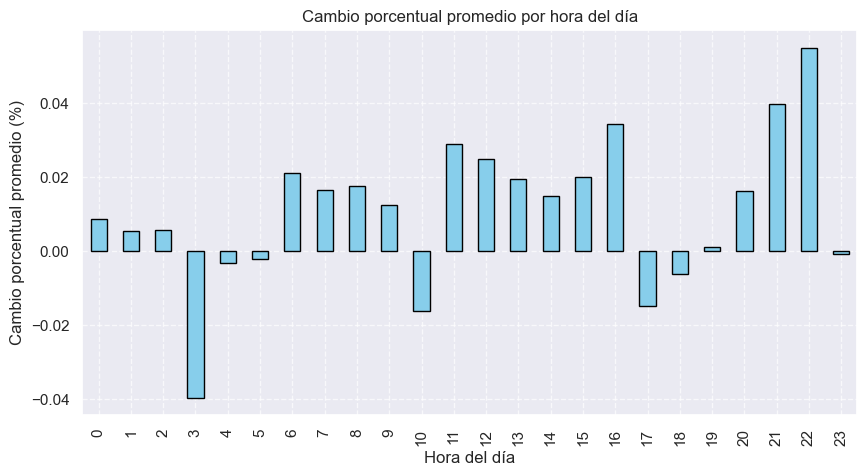

In [6]:
# Convertir la columna 'Hora' a tipo datetime
df_filtrado['Hora'] = pd.to_datetime(df_filtrado['Hora'], format='%H:%M')

# Calcular el cambio porcentual promedio por hora del día
df_filtrado['Cambio (%)'] = ((df_filtrado['Close'] - df_filtrado['Open']) / df_filtrado['Open']) * 100

# Calcular el cambio porcentual promedio por hora del día
cambio_porcentaje_promedio_hora = df_filtrado.groupby(df_filtrado['Hora'].dt.hour)['Cambio (%)'].mean()

# Imprimir el cambio porcentual promedio por hora del día
#print("Cambio porcentual promedio por hora del día:")
#print(cambio_porcentaje_promedio_hora)

# Asumiendo que df_filtrado ya está definido y has ejecutado el código anterior

# Configurar el estilo del gráfico usando Seaborn
sns.set_theme(style='darkgrid')

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 5))

# Graficar el cambio porcentual promedio por hora del día
cambio_porcentaje_promedio_hora.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')

# Añadir etiquetas y título
ax.set_xlabel('Hora del día')
ax.set_ylabel('Cambio porcentual promedio (%)')
ax.set_title('Cambio porcentual promedio por hora del día')

# Mostrar la grilla
ax.grid(True, linestyle='--', alpha=0.7)

# Ajustar las etiquetas del eje x para mostrar cada hora
ax.set_xticks(range(24))
ax.set_xticklabels(range(24))

# Mostrar el gráfico
plt.show()

### Dias de la semana

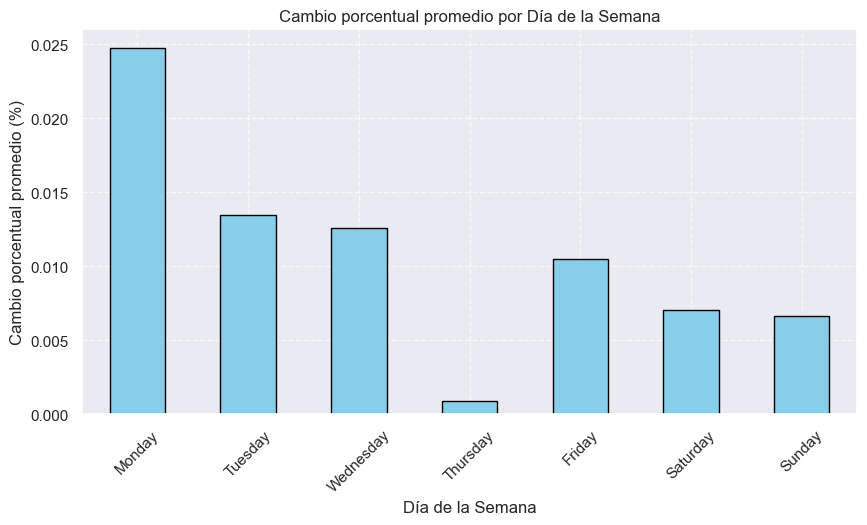

In [7]:
# Orden de los días de la semana
orden_dias = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Cálculo del cambio porcentual diario
df_filtrado['Cambio %'] = (df_filtrado['Close'] - df_filtrado['Open']) / df_filtrado['Open'] * 100

# Agrupar por días de la semana y calcular la media del cambio porcentual
promedio_por_dia = df_filtrado.groupby(df_filtrado["Fecha"].dt.day_name())['Cambio %'].mean()

# Reindexar el resultado para que esté en el orden correcto de los días de la semana
promedio_por_dia = promedio_por_dia.reindex(orden_dias)

#print(promedio_por_dia)

# Configurar el estilo del gráfico usando Seaborn
sns.set_theme(style='darkgrid')

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 5))

# Graficar el cambio porcentual promedio por día de la semana
promedio_por_dia.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')

# Añadir etiquetas y título
ax.set_xlabel('Día de la Semana')
ax.set_ylabel('Cambio porcentual promedio (%)')
ax.set_title('Cambio porcentual promedio por Día de la Semana')

# Mostrar la grilla
ax.grid(True, linestyle='--', alpha=0.7)

# Ajustar las etiquetas del eje x para mostrar los nombres de los días
ax.set_xticklabels(orden_dias, rotation=45)

# Mostrar el gráfico
plt.show()

### Meses

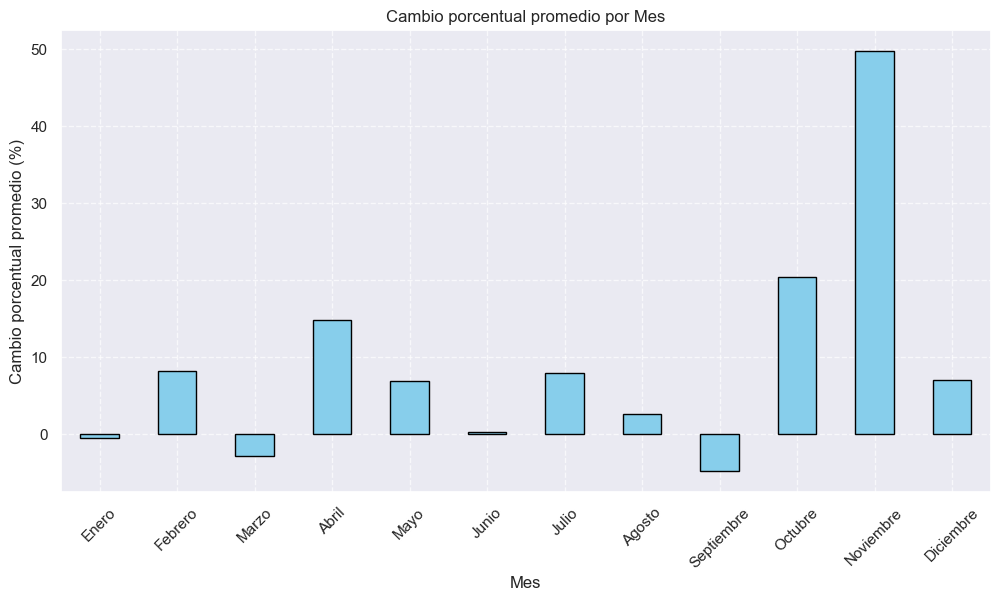

In [8]:
# MESES #######################################################################

# Asegurarse que 'Fecha' es de tipo datetime y establecerlo como índice
df_filtrado['Fecha'] = pd.to_datetime(df_filtrado['Fecha'])
df_filtrado.set_index('Fecha', inplace=True)

# Realizar el resample para obtener el cambio por mes
primer_dia = df_filtrado.resample('M').first()
ultimo_dia = df_filtrado.resample('M').last()

# Calcular el cambio porcentual por mes
cambio_por_mes = (ultimo_dia['Close'] - primer_dia['Open']) / primer_dia['Open'] * 100

# Calcular la media de los cambios por mes
media_por_mes = cambio_por_mes.groupby(cambio_por_mes.index.month).mean()

# Opcional: renombrar índices para mejor claridad
meses_nombres = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", 
                 "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]
media_por_mes.index = [meses_nombres[i-1] for i in media_por_mes.index]

#print(media_por_mes)

# Configurar el estilo del gráfico usando Seaborn
sns.set_theme(style='darkgrid')

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar el cambio porcentual promedio por mes
media_por_mes.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')

# Añadir etiquetas y título
ax.set_xlabel('Mes')
ax.set_ylabel('Cambio porcentual promedio (%)')
ax.set_title('Cambio porcentual promedio por Mes')

# Mostrar la grilla
ax.grid(True, linestyle='--', alpha=0.7)

# Ajustar las etiquetas del eje x para mostrar los nombres de los meses
ax.set_xticklabels(media_por_mes.index, rotation=45)

# Mostrar el gráfico
plt.show()


### Dia del mes

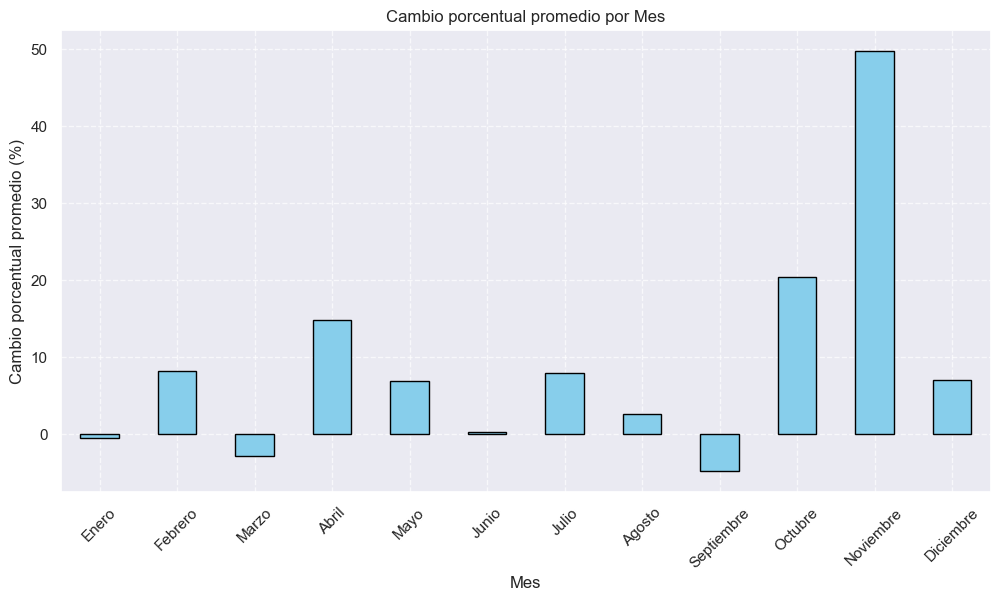

In [9]:
# Agrupar por día del mes
grouped_by_day = df_filtrado.groupby(df_filtrado.index.day)

# Calcular el cambio porcentual promedio para cada día del mes
cambio_por_dia_mes = grouped_by_day.apply(lambda x: ((x['Close'] - x['Open']) / x['Open'] * 100).mean())

#print(cambio_por_dia_mes)


# Añadir una columna que indica el número de semana del año
df_filtrado['Semana_Anual'] = df_filtrado.index.isocalendar().week

# Calcular el cambio porcentual promedio para cada semana
promedio_semana_anual = df_filtrado.groupby('Semana_Anual').apply(lambda x: ((x['Close'] - x['Open']) / x['Open']).mean() * 100)

#print(promedio_semana_anual.sort_index())

# Configurar el estilo del gráfico usando Seaborn
sns.set_theme(style='darkgrid')

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar el cambio porcentual promedio por mes
media_por_mes.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')

# Añadir etiquetas y título
ax.set_xlabel('Mes')
ax.set_ylabel('Cambio porcentual promedio (%)')
ax.set_title('Cambio porcentual promedio por Mes')

# Mostrar la grilla
ax.grid(True, linestyle='--', alpha=0.7)

# Ajustar las etiquetas del eje x para mostrar los nombres de los meses
ax.set_xticklabels(media_por_mes.index, rotation=45)

# Mostrar el gráfico
plt.show()


### Next 1 Day

Dia_Anterior  Direccion
Alcista       Bajista      51.223321
              Alcista      48.776679
Bajista       Alcista      55.039194
              Bajista      44.960806
Name: proportion, dtype: float64


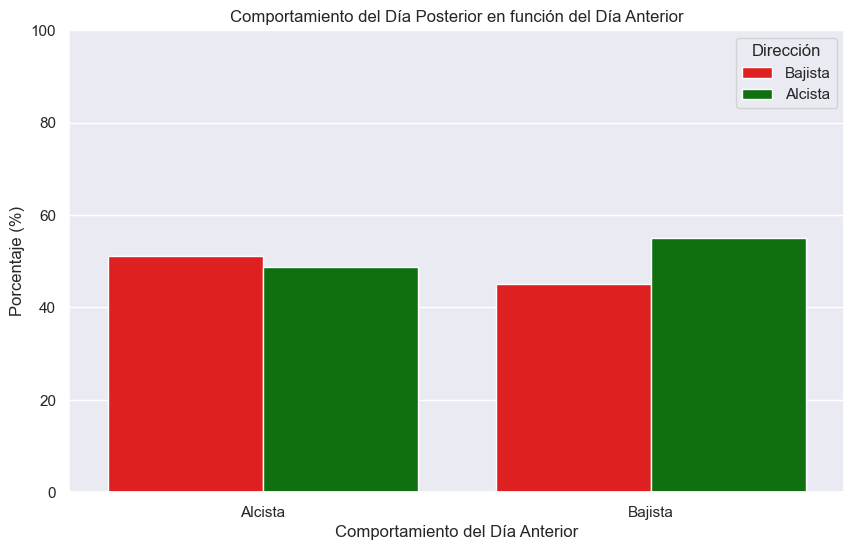

In [18]:
# Crear una Serie agrupada por días
def calcular_cambio(grupo):
    if not grupo.empty:  # Asegurarnos que el grupo tiene datos
        return (grupo['Close'].iloc[-1] - grupo['Open'].iloc[0]) / grupo['Open'].iloc[0] * 100
    return None

df_dias = df_filtrado.resample('D').apply(calcular_cambio)
df_dias = df_dias.dropna().to_frame()  # Convertir a DataFrame y eliminar NaNs

# Renombrar la columna para que sea más descriptiva
df_dias.columns = ['Cambio %']

# Determinar si el día fue alcista o bajista
df_dias['Direccion'] = df_dias['Cambio %'].apply(lambda x: 'Alcista' if x > 0 else 'Bajista')

# Crear una columna que indique el comportamiento del día anterior
df_dias['Dia_Anterior'] = df_dias['Direccion'].shift(1)

# Construir la estadística
comportamiento_posterior = df_dias.groupby('Dia_Anterior')['Direccion'].value_counts(normalize=True) * 100

print(comportamiento_posterior)

# Convertir la serie en un DataFrame para facilitar la visualización
df_comportamiento = comportamiento_posterior.reset_index()
df_comportamiento.columns = ['Dia_Anterior', 'Direccion', 'Porcentaje']

# Definir un diccionario con los colores deseados
colores = {"Alcista": "green", "Bajista": "red"}

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Dia_Anterior', y='Porcentaje', hue='Direccion', data=df_comportamiento, palette=colores)

# Añadir etiquetas y título
plt.xlabel('Comportamiento del Día Anterior')
plt.ylabel('Porcentaje (%)')
plt.title('Comportamiento del Día Posterior en función del Día Anterior')
plt.ylim(0, 100)  # Establecer límites para el eje y

# Mostrar la leyenda y el gráfico
plt.legend(title='Dirección')
plt.show()

### Next 2 Days

Combinacion_3_Dias
Alcista_Alcista_Bajista    28.119609
Alcista_Alcista_Alcista    25.761932
Bajista_Bajista_Alcista    25.301898
Bajista_Bajista_Bajista    20.816561
Name: proportion, dtype: float64


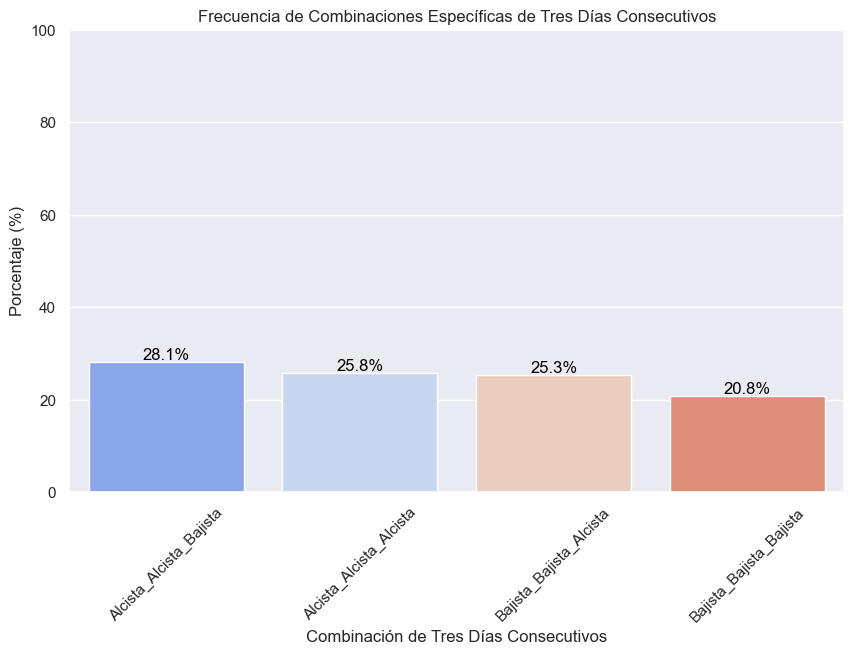

In [19]:
# Crear una columna que indique el comportamiento del día anterior
df_dias['Dia_Anterior_1'] = df_dias['Direccion'].shift(1)
df_dias['Dia_Anterior_2'] = df_dias['Direccion'].shift(2)

# Crear una columna que combine la dirección de los dos días anteriores y el día actual
df_dias['Combinacion_3_Dias'] = df_dias['Dia_Anterior_2'] + "_" + df_dias['Dia_Anterior_1'] + "_" + df_dias['Direccion']

# Filtrar solo las combinaciones que nos interesan: 'Alcista_Alcista' y 'Bajista_Bajista'
combinaciones_interesantes = ['Alcista_Alcista_Alcista', 'Bajista_Bajista_Bajista', 'Alcista_Alcista_Bajista', 'Bajista_Bajista_Alcista']
df_dias_filtrado = df_dias[df_dias['Combinacion_3_Dias'].isin(combinaciones_interesantes)]

# Construir la estadística
comportamiento_posterior = df_dias_filtrado['Combinacion_3_Dias'].value_counts(normalize=True) * 100

print(comportamiento_posterior)

# Convertir la serie en un DataFrame para facilitar la visualización
df_comportamiento = comportamiento_posterior.reset_index()
df_comportamiento.columns = ['Combinacion_3_Dias', 'Porcentaje']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Combinacion_3_Dias', y='Porcentaje', data=df_comportamiento, palette='coolwarm')

# Añadir etiquetas y título
plt.xlabel('Combinación de Tres Días Consecutivos')
plt.ylabel('Porcentaje (%)')
plt.title('Frecuencia de Combinaciones Específicas de Tres Días Consecutivos')
plt.ylim(0, 100)  # Establecer límites para el eje y

# Mostrar los porcentajes en las barras
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                     textcoords='offset points')

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.show()

### Next 3 Days

Combinacion_4_Dias
Alcista_Bajista_Alcista_Alcista    15.303283
Alcista_Alcista_Bajista_Alcista    14.858097
Bajista_Bajista_Alcista_Bajista    12.632165
Alcista_Alcista_Alcista_Bajista    12.520868
Alcista_Alcista_Alcista_Alcista    12.409572
Bajista_Alcista_Bajista_Bajista    12.186978
Bajista_Bajista_Bajista_Alcista    11.185309
Bajista_Bajista_Bajista_Bajista     8.903728
Name: proportion, dtype: float64


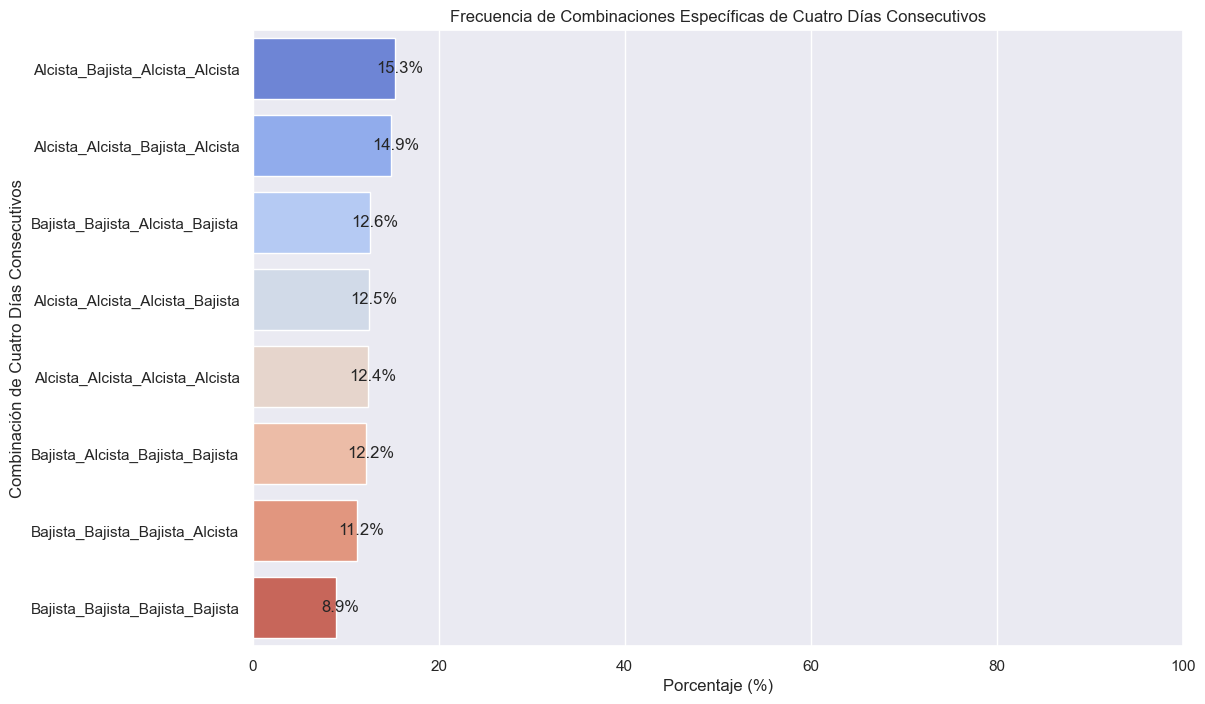

In [20]:
# Crear columnas que indiquen el comportamiento de los tres días anteriores
df_dias['Dia_Anterior_1'] = df_dias['Direccion'].shift(1)
df_dias['Dia_Anterior_2'] = df_dias['Direccion'].shift(2)
df_dias['Dia_Anterior_3'] = df_dias['Direccion'].shift(3)

# Crear una columna que combine la dirección de los tres días anteriores y el día actual
df_dias['Combinacion_4_Dias'] = df_dias['Dia_Anterior_3'] + "_" + df_dias['Dia_Anterior_2'] + "_" + df_dias['Dia_Anterior_1'] + "_" + df_dias['Direccion']

# Filtrar solo las combinaciones que nos interesan
combinaciones_interesantes = ['Alcista_Alcista_Alcista_Alcista', 'Bajista_Bajista_Bajista_Bajista', 
                              'Alcista_Alcista_Alcista_Bajista', 'Bajista_Bajista_Bajista_Alcista',
                              'Alcista_Alcista_Bajista_Alcista', 'Bajista_Bajista_Alcista_Bajista',
                              'Alcista_Bajista_Alcista_Alcista', 'Bajista_Alcista_Bajista_Bajista']
df_dias_filtrado = df_dias[df_dias['Combinacion_4_Dias'].isin(combinaciones_interesantes)]

# Construir la estadística
comportamiento_posterior = df_dias_filtrado['Combinacion_4_Dias'].value_counts(normalize=True) * 100

print(comportamiento_posterior)

# Convertir la serie en un DataFrame para facilitar la visualización
df_comportamiento = comportamiento_posterior.reset_index()
df_comportamiento.columns = ['Combinacion_4_Dias', 'Porcentaje']

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Porcentaje', y='Combinacion_4_Dias', data=df_comportamiento, palette='coolwarm')

# Añadir etiquetas y título
plt.xlabel('Porcentaje (%)')
plt.ylabel('Combinación de Cuatro Días Consecutivos')
plt.title('Frecuencia de Combinaciones Específicas de Cuatro Días Consecutivos')
plt.xlim(0, 100)  # Establecer límites para el eje x

# Mostrar los porcentajes al lado de las barras
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 0.5, p.get_y() + p.get_height() / 2,
             f'{width:.1f}%', ha='center', va='center')

# Mostrar el gráfico
plt.show()

### Next 4 Days

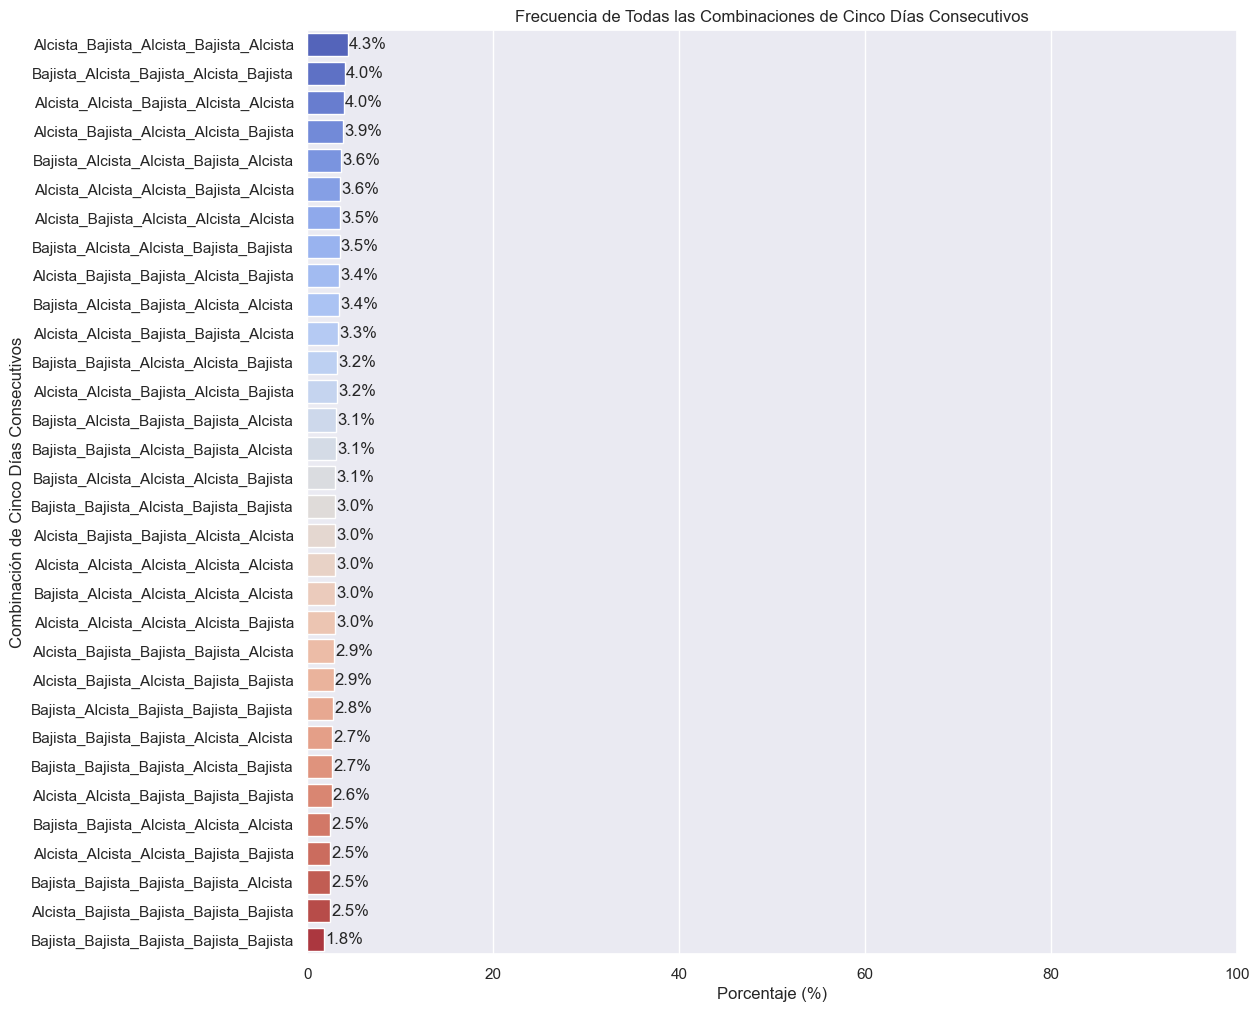

In [22]:
# Crear columnas que indiquen el comportamiento de los cuatro días anteriores
df_dias['Dia_Anterior_1'] = df_dias['Direccion'].shift(1)
df_dias['Dia_Anterior_2'] = df_dias['Direccion'].shift(2)
df_dias['Dia_Anterior_3'] = df_dias['Direccion'].shift(3)
df_dias['Dia_Anterior_4'] = df_dias['Direccion'].shift(4)

# Crear una columna que combine la dirección de los cuatro días anteriores y el día actual
df_dias['Combinacion_5_Dias'] = df_dias['Dia_Anterior_4'] + "_" + df_dias['Dia_Anterior_3'] + "_" + df_dias['Dia_Anterior_2'] + "_" + df_dias['Dia_Anterior_1'] + "_" + df_dias['Direccion']

# Construir la estadística para todas las combinaciones
comportamiento_posterior = df_dias['Combinacion_5_Dias'].value_counts(normalize=True) * 100

# Convertir la serie en un DataFrame para facilitar la visualización
df_comportamiento = comportamiento_posterior.reset_index()
df_comportamiento.columns = ['Combinacion_5_Dias', 'Porcentaje']

# Crear el gráfico de barras
plt.figure(figsize=(12, 12))
barplot = sns.barplot(x='Porcentaje', y='Combinacion_5_Dias', data=df_comportamiento, palette='coolwarm')

# Añadir etiquetas y título
plt.xlabel('Porcentaje (%)')
plt.ylabel('Combinación de Cinco Días Consecutivos')
plt.title('Frecuencia de Todas las Combinaciones de Cinco Días Consecutivos')
plt.xlim(0, 100)  # Establecer límites para el eje x

# Mostrar los porcentajes al lado de las barras
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height() / 2,
             f'{width:.1f}%', ha='left', va='center')

# Mostrar el gráfico
plt.show()


### Next 5 Days

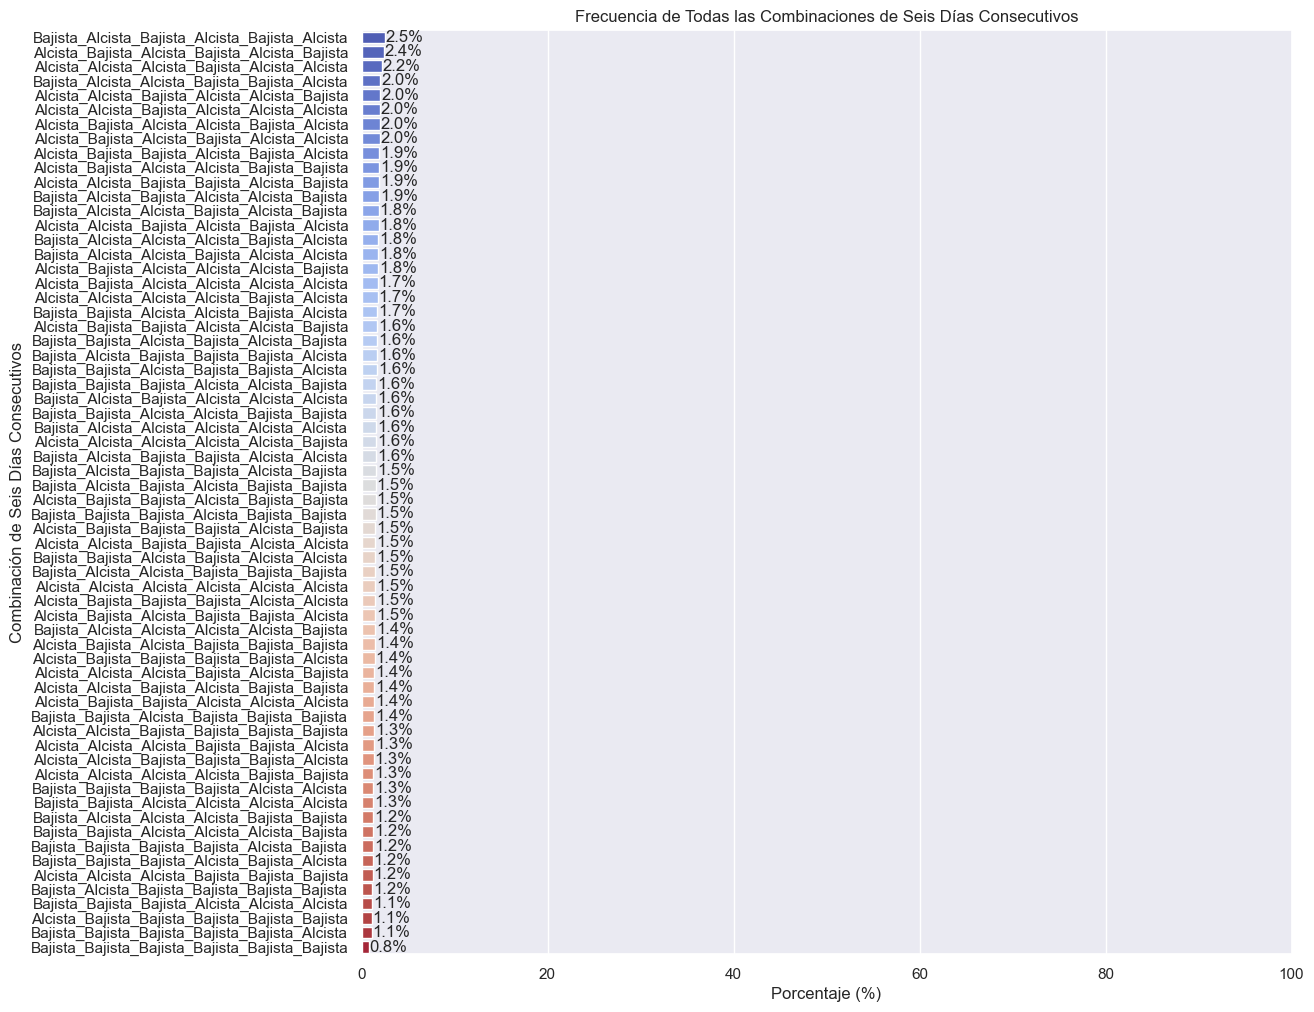

In [23]:
# Crear columnas que indiquen el comportamiento de los cinco días anteriores
df_dias['Dia_Anterior_1'] = df_dias['Direccion'].shift(1)
df_dias['Dia_Anterior_2'] = df_dias['Direccion'].shift(2)
df_dias['Dia_Anterior_3'] = df_dias['Direccion'].shift(3)
df_dias['Dia_Anterior_4'] = df_dias['Direccion'].shift(4)
df_dias['Dia_Anterior_5'] = df_dias['Direccion'].shift(5)

# Crear una columna que combine la dirección de los cinco días anteriores y el día actual
df_dias['Combinacion_6_Dias'] = (df_dias['Dia_Anterior_5'] + "_" + df_dias['Dia_Anterior_4'] + "_" + 
                                 df_dias['Dia_Anterior_3'] + "_" + df_dias['Dia_Anterior_2'] + "_" + 
                                 df_dias['Dia_Anterior_1'] + "_" + df_dias['Direccion'])

# Construir la estadística para todas las combinaciones
comportamiento_posterior = df_dias['Combinacion_6_Dias'].value_counts(normalize=True) * 100

# Convertir la serie en un DataFrame para facilitar la visualización
df_comportamiento = comportamiento_posterior.reset_index()
df_comportamiento.columns = ['Combinacion_6_Dias', 'Porcentaje']

# Crear el gráfico de barras
plt.figure(figsize=(12, 12))
barplot = sns.barplot(x='Porcentaje', y='Combinacion_6_Dias', data=df_comportamiento, palette='coolwarm')

# Añadir etiquetas y título
plt.xlabel('Porcentaje (%)')
plt.ylabel('Combinación de Seis Días Consecutivos')
plt.title('Frecuencia de Todas las Combinaciones de Seis Días Consecutivos')
plt.xlim(0, 100)  # Establecer límites para el eje x

# Mostrar los porcentajes al lado de las barras
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height() / 2,
             f'{width:.1f}%', ha='left', va='center')

# Mostrar el gráfico
plt.show()


## Informe pericial

### Umbrales en %

In [15]:
# INFORME #####################################################################

MonthUmbral = 4
WeekUmbral = 0.02
DayUmbral = 0.02
HourUmbral = 0.02
informe = ""

In [16]:
# Horas #######################################################################
# Calcular las horas con tendencia al alza y a la baja según el umbral
horas_significativas_alza = cambio_porcentaje_promedio_hora[cambio_porcentaje_promedio_hora > HourUmbral].index.tolist()
horas_significativas_baja = cambio_porcentaje_promedio_hora[cambio_porcentaje_promedio_hora < -HourUmbral].index.tolist()

# Crear un informe con las horas significativas
informe = "Horas con tendencia al alza significativa: {}\n".format(', '.join(map(str, horas_significativas_alza)))
informe += "Horas con tendencia a la baja significativa: {}\n\n".format(', '.join(map(str, horas_significativas_baja)))


# Días de la semana ###########################################################
dias_significativos_alza = promedio_por_dia[promedio_por_dia > DayUmbral].index.tolist()
dias_significativos_baja = promedio_por_dia[promedio_por_dia < -DayUmbral].index.tolist()

informe += "Días de la semana con tendencia al alza significativa: {}\n".format(', '.join(dias_significativos_alza))
informe += "Días de la semana con tendencia a la baja significativa: {}\n\n".format(', '.join(dias_significativos_baja))

# Calcular los meses con tendencia al alza y a la baja según el umbral
meses_significativos_alza = media_por_mes[media_por_mes > MonthUmbral].index.tolist()
meses_significativos_baja = media_por_mes[media_por_mes < -MonthUmbral].index.tolist()

# Meses significativos ########################################################
informe += "Meses con tendencia al alza significativa: {}\n".format(', '.join(meses_significativos_alza))
informe += "Meses con tendencia a la baja significativa: {}\n\n".format(', '.join(meses_significativos_baja))


# Días del mes ################################################################
dias_mes_significativos_alza = cambio_por_dia_mes[cambio_por_dia_mes > DayUmbral].index.tolist()
dias_mes_significativos_baja = cambio_por_dia_mes[cambio_por_dia_mes < -DayUmbral].index.tolist()

informe += "Días del mes con tendencia al alza significativa: {}\n".format(', '.join(map(str, dias_mes_significativos_alza)))
informe += "Días del mes con tendencia a la baja significativa: {}\n\n".format(', '.join(map(str, dias_mes_significativos_baja)))

# Semanas del año #############################################################
semanas_anual_significativos_alza = promedio_semana_anual[promedio_semana_anual > WeekUmbral].index.tolist()
semanas_anual_significativos_baja = promedio_semana_anual[promedio_semana_anual < -WeekUmbral].index.tolist()

informe += "Semanas del año con tendencia al alza significativa: {}\n".format(', '.join(map(str, semanas_anual_significativos_alza)))
informe += "Semanas del año con tendencia a la baja significativa: {}\n".format(', '.join(map(str, semanas_anual_significativos_baja)))

print(informe)

Horas con tendencia al alza significativa: 6, 11, 12, 15, 16, 21, 22
Horas con tendencia a la baja significativa: 3

Días de la semana con tendencia al alza significativa: Monday
Días de la semana con tendencia a la baja significativa: 

Meses con tendencia al alza significativa: Febrero, Abril, Mayo, Julio, Octubre, Noviembre, Diciembre
Meses con tendencia a la baja significativa: Septiembre

Días del mes con tendencia al alza significativa: 2, 3, 12, 17, 19, 20, 23, 26, 28, 29
Días del mes con tendencia a la baja significativa: 21

Semanas del año con tendencia al alza significativa: 7, 14, 16, 17, 22, 29, 31, 41, 42, 43, 44, 46, 48, 52, 53
Semanas del año con tendencia a la baja significativa: 

